# **Importing All the necessary Libraries**

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


## **Splitting the MNIST dataset into Train and Test**

In [ ]:

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

## **Printing the Data**

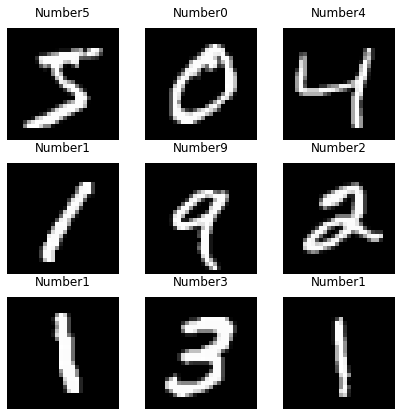

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axs=plt.subplots(3,3,figsize=(7,7))
plt.gray()

for i,ax in enumerate(axs.flat):
      ax.matshow(x_train[i])
      ax.axis('off')
      ax.set_title('Number{}'.format(y_train[i]))

fig.show()


# **Pre-processing the input Data**

In [ ]:
num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28
 
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


print("X_train Shape : ",x_train.shape)
print("Number of images in x_train ",x_train.shape[0])
print("Number of images in x_test ",x_test.shape[0])

X_train Shape :  (60000, 28, 28, 1)
Number of images in x_train  60000
Number of images in x_test  10000


**Defining the Model Architecture**

In [ ]:
from tensorflow.python.ops.nn_ops import dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

model=Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

**Compiling the model**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# **Fitting the model on taining data**

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 23s 49ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0446 - val_accuracy: 0.9850
Epoch 2/12
469/469 [==============================] - 23s 49ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 3/12
469/469 [==============================] - 23s 49ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 4/12
469/469 [==============================] - 23s 48ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0403 - val_accuracy: 0.9874
Epoch 5/12
469/469 [==============================] - 22s 48ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 6/12
469/469 [==============================] - 22s 48ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 7/12
469/469 [==============================] - 23s 49ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0432 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05194013565778732
Test accuracy: 0.987500011920929


# **Saving the Model**

In [ ]:
model.save('trained_model.h5')